# Part II - Ford GoBike System Duration Analysis
## by Emem Brownson

## Investigation Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It has 183412 rows and 16 columns. Some wrangling process was needed to tidy the dataset for exploration. After tidying the dataset, I was left with 174952 rows and 19 columns which is saved as a .csv file called `goBike_clean.csv` (This dataset is what I used for the analysis). it has variables (columns) like `start_time(hr)`, `start_day`, `start_month`, `duration_sec` , `user_type`, `member_gender`, `age` etc.


## Dataset Overview

For the explanatory analysis/presentation, I will polish and visualized some of the analysis done in the exploratory analysis section which are:
 - How long does the average trip take and on which day?
 - On which day(s) and at what time were most trip taken?
 - Which user took the longest trip on average and at what time of the day

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
clean_goBike = pd.read_csv('goBike_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How long does the average trip take and on which day?

The longest trips on average happened on weekends, Saturdays and Sundays. It took about 800 to 850 seconds on average.

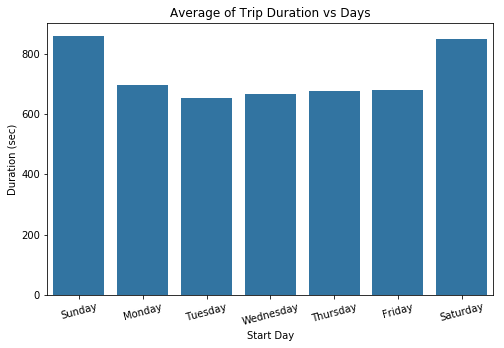

In [3]:
#let's use groupby to group and take mean for duration sec. then put it in a dataframe called sec_day
sec_day=pd.DataFrame(clean_goBike.groupby('start_day').duration_sec.mean()).reset_index()

#cartegorize days orderly from Sunday to Saturday
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']

#set to use one colour
base_color = sb.color_palette()[0]

#Function to plot the chart
def duration_day():
    """ This function plots the duration of trip taken per day """
    plt.figure(figsize = [8, 5])
    sb.barplot(x='start_day', y='duration_sec', data=sec_day, order=day_order,color=base_color);
    plt.xticks(rotation=15)
    plt.xlabel("Start Day")
    plt.ylabel("Duration (sec)")
    plt.title("Average of Trip Duration vs Days")
duration_day();

## On which day(s) and at what time were most trip taken?

Thursdays has the highest trip made at the 17 hour compared to the rest of the days followed by Wednesday. Also, Friday has the highest trip at the 8 hour compared to the rest of the days. Although, the relationship between Thursday and Wednesday for the 17 hour are closely related.

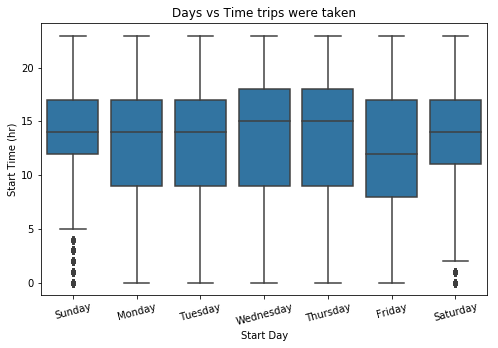

In [4]:
#cartegorize days orderly from Sunday to Saturday
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']

#set figure size and colour
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]

#Function to plot the chart
def day_time():
    """ This function plots the day and time trips were taken """
    sb.boxplot(data=clean_goBike, x='start_day', y='start_time(hr)', order=day_order, color=base_color)
    plt.xticks(rotation=15)
    plt.xlabel("Start Day")
    plt.ylabel("Start Time (hr)")
    plt.title("Days vs Time trips were taken")
day_time();

## Which user took the longest trip on average and at what time of the day

The longest trip was taken by a customer at the hour of 3 for about 5000 seconds.

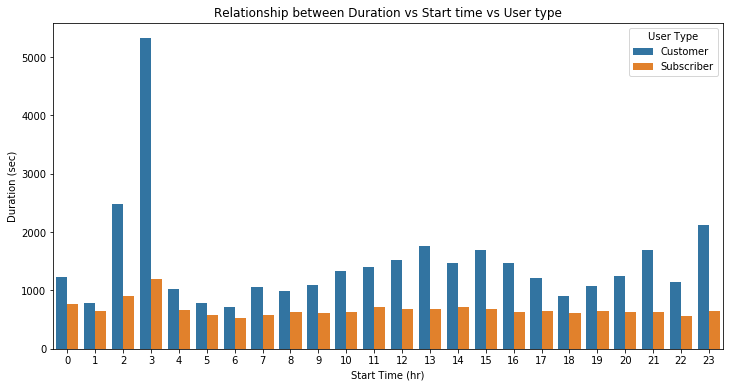

In [5]:
#checking reletionship between duration_sec, start_time(hr) and user_type

def trip_day_user():
    """ This function plot the reletionship between the duration, time trip was taken and the user type """
    plt.figure(figsize=(12,6))
    sb.barplot(data=clean_goBike, x='start_time(hr)', y='duration_sec', ci=None, hue='user_type')
    plt.xlabel("Start Time (hr)")
    plt.ylabel("Duration (sec)")
    plt.title("Relationship between Duration vs Start time vs User type")
    plt.gca().legend().set_title('User Type')
trip_day_user();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 338437 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 